## Baseline Modeling - Logistic Regression


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn import set_config
set_config(display= 'diagram')
from imblearn.under_sampling import RandomUnderSampler

In [9]:
masterdf=pd.read_csv('AttritionRate_EDA.csv')

In [10]:
masterdf.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Age', 'Attrition', 'BusinessTravel',
       'DailyRate', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'AgeRange',
       'IncomeDistribution', 'YearlyIncome'],
      dtype='object')

In [11]:
masterdf=masterdf.drop(['Unnamed: 0','Unnamed: 0.1','EmployeeCount','EmployeeNumber','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','JobLevel'],axis=1)

In [12]:
y=masterdf['Attrition']
X=masterdf.drop(['Attrition'],axis=1)
smote = SMOTE(sampling_strategy=0.8)
(X_train,X_test,y_train,y_test)=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
num_cols=X_train.select_dtypes(['int','float']).columns
num_cols

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'YearlyIncome'],
      dtype='object')

In [14]:
nominal_cols=X_train.select_dtypes('object').columns
nominal_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'AgeRange', 'IncomeDistribution'],
      dtype='object')

In [15]:
numeric_pipeline = Pipeline([('std_scaler', StandardScaler())])

nominal_pipeline=Pipeline([('hotenco',OneHotEncoder(categories='auto',drop='first')),('onehotnorm',MaxAbsScaler())])

ct = ColumnTransformer([ 
     ("nominalpipe", nominal_pipeline,nominal_cols),
     ("numpipe", numeric_pipeline,num_cols)])


In [16]:
pd.DataFrame(ct.fit_transform(X_train)).head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.639822,2.547471,-1.167368,0.157319,0.357435,-0.974263,-0.888208,-0.676110,-1.142448,-0.868277
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.211176,-0.945525,-1.423397,-0.613546,0.357435,-1.138573,-1.165051,-0.676110,-1.142448,-1.132807
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.211176,0.218807,-0.143254,-0.613546,0.357435,-0.645643,-0.611364,-0.676110,-0.575084,0.116537
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.285677,-0.945525,-0.527297,0.157319,0.357435,-0.317023,-0.057676,-0.355244,-1.142448,-0.231070
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-1.565321,0.218807,-0.143254,-0.613546,0.357435,0.504527,1.049700,-0.676110,-0.575084,-0.464366


In [19]:
final_pipe = Pipeline([('preprocess', ct),
                       ('under', RandomUnderSampler(sampling_strategy=0.5)),
                      ('lr',
                       LogisticRegression())])

In [20]:
final_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('hotenco',
                                                                   OneHotEncoder(drop='first')),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'AgeRange', 'IncomeDistribution'],
      dtype='object')),
                                                 ('numpipe',
                                                  Pipeline(steps=[('std_scaler',
                                                                   Stand...
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'YearlyIncome'],
      dtype='object'))])),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('lr', LogisticRegression())])

In [21]:
y_pred=final_pipe.predict(X_test)

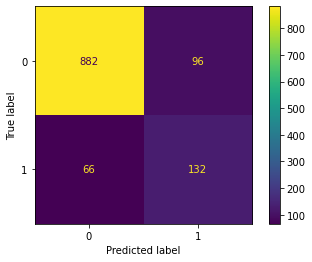

In [22]:
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix

plot_confusion_matrix(final_pipe, X_train,
                      y_train)

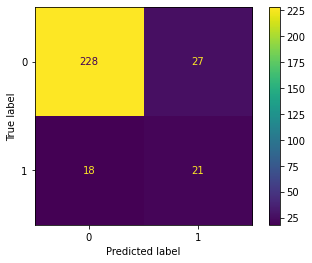

In [23]:
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix

plot_confusion_matrix(final_pipe, X_test,
                      y_test)

In [24]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       255
           1       0.44      0.54      0.48        39

    accuracy                           0.85       294
   macro avg       0.68      0.72      0.70       294
weighted avg       0.86      0.85      0.85       294



In [25]:
y_score = final_pipe.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [26]:
from sklearn.metrics import roc_curve, auc

print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7730517848164907


AUC: 0.7730517848164907


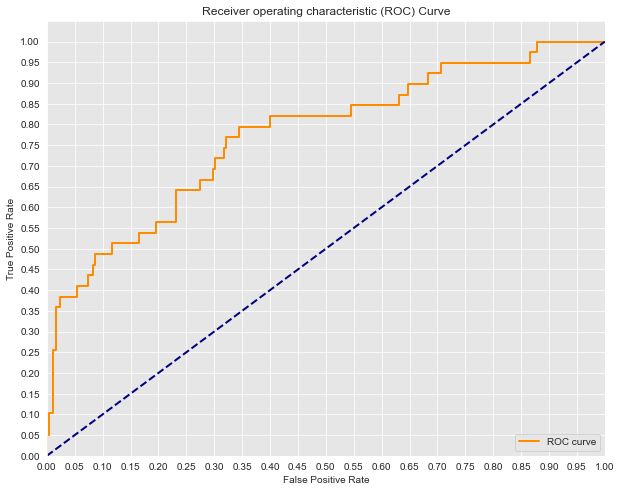

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Baseline Model Tuning

In [28]:
C_list = [1e-4,1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3, 1e4]
cv_scores = []
cv_scores_std = []

for c in C_list:
    final_pipe = Pipeline([('preprocess', ct),
                        ('under', RandomUnderSampler(sampling_strategy=0.5)),
                      ('lr',LogisticRegression(C=c))])
    
    final_pipe.fit(X_train,y_train)
    scores = final_pipe.score(X_test,y_test)
    cv_scores.append(scores)
    
    
    
#     cv_loop_results = cross_validate(
#                 X=ct.fit_transform(X_train), 
#                 y=y_train,
#                 estimator=lr, 
#                 cv=8)
#     cv_scores.append(np.mean(np.sqrt(np.abs(cv_loop_results['test_score']))))
#     cv_scores_std.append(np.std(np.sqrt(np.abs(cv_loop_results['test_score']))))

In [29]:
cv_scores

[0.8673469387755102,
 0.8673469387755102,
 0.9047619047619048,
 0.8707482993197279,
 0.8333333333333334,
 0.826530612244898,
 0.8197278911564626,
 0.8197278911564626,
 0.7959183673469388]

In [30]:
predict=final_pipe.predict(X_test)

Accuracy Score: 0.7959183673469388
Precision Score: 0.3220338983050847
Recall Score: 0.48717948717948717
F1 Score: 0.3877551020408163


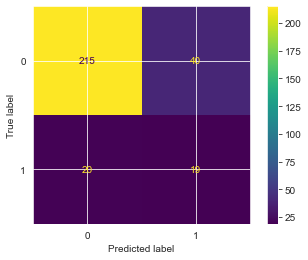

In [31]:
plot_confusion_matrix(final_pipe, X_test,
                      y_test)
print(f'Accuracy Score: {accuracy_score(y_test,predict)}')
print(f'Precision Score: {precision_score(y_test,predict)}')
print(f'Recall Score: {recall_score(y_test,predict)}')
print(f'F1 Score: {f1_score(y_test,predict)}')

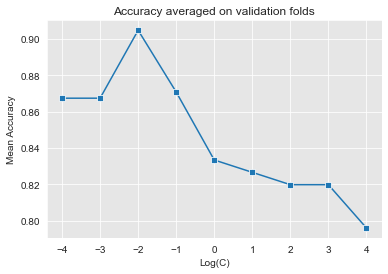

In [32]:
fig, ax = plt.subplots()
sns.lineplot(x = np.log10(C_list), y = cv_scores, marker = 's', ax = ax)
ax.set_xlabel('Log(C)')
ax.set_ylabel('Mean Accuracy')
ax.set_title('Accuracy averaged on validation folds')
plt.show()

#### Best parameter for logsistic regression model - regularization = 1e-2

In [36]:
final_final_pipe = Pipeline([('preprocess', ct),
                       ('under', RandomUnderSampler(sampling_strategy=0.5)),
                      ('lr',LogisticRegression(C=1e-2))])

final_final_pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('hotenco',
                                                                   OneHotEncoder(drop='first')),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'AgeRange', 'IncomeDistribution'],
      dtype='object')),
                                                 ('numpipe',
                                                  Pipeline(steps=[('std_scaler',
                                                                   Stand...
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'YearlyIncome'],
      dtype='object'))])),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ('lr', LogisticRegression(C=0.01))])

In [37]:
predict=final_final_pipe.predict(X_test)

Accuracy Score: 0.8945578231292517
Precision Score: 0.6428571428571429
Recall Score: 0.46153846153846156
F1 Score: 0.537313432835821


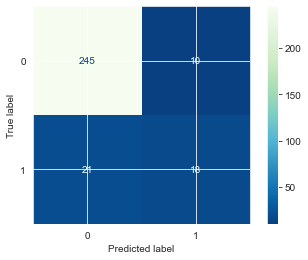

In [38]:
plot_confusion_matrix(final_final_pipe, X_test,
                      y_test,cmap="GnBu_r")
print(f'Accuracy Score: {accuracy_score(y_test,predict)}')
print(f'Precision Score: {precision_score(y_test,predict)}')
print(f'Recall Score: {recall_score(y_test,predict)}')
print(f'F1 Score: {f1_score(y_test,predict)}')

### Extract Weighted Factors

In [39]:
feature_weight=final_final_pipe[-1].coef_

In [40]:
ohe = OneHotEncoder(handle_unknown = 'ignore')

ohe_train = ohe.fit_transform(X_train[nominal_cols]).toarray()
ohe_test = ohe.transform(X_test[nominal_cols]).toarray()

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

col=X_train.drop(X_train[nominal_cols],axis=1)
features=col.columns

ohe_cols=ohe_train.columns
column_names=np.append(features,ohe_cols)

In [41]:
lrweight=feature_weight[0]

In [42]:
lrweightgraph=lrweight[0:20]

In [43]:
feature_importance=zip(features,lrweight)

In [44]:
feature_importance

In [45]:
len(features)

20

In [46]:
len(lrweightgraph)

20

In [47]:
lrweightgraph

array([ 0.09620908, -0.02064925, -0.12366615,  0.11544469, -0.02599387,
        0.0205984 , -0.05624765, -0.01360643,  0.0529285 ,  0.05477616,
        0.01094918,  0.06774923, -0.0134818 , -0.05042249, -0.036608  ,
       -0.01464963,  0.01630816,  0.09529869, -0.05194178,  0.15845365])

In [48]:
feature=np.array(features)
weight=np.array(lrweightgraph)

In [49]:
coef = pd.DataFrame({'feature': feature, 'weight': list(weight)}, columns=['feature', 'weight'])
coef=coef.sort_values(by='weight')

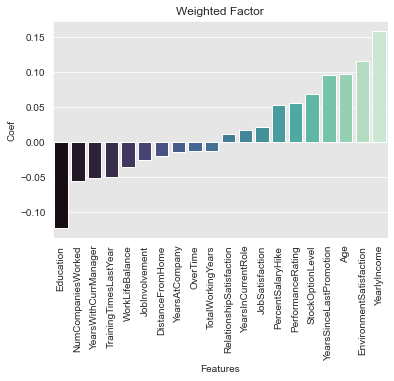

In [50]:
sns.barplot(data=coef,x='feature',y='weight',palette='mako')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coef')
plt.title('Weighted Factor')
plt.show()

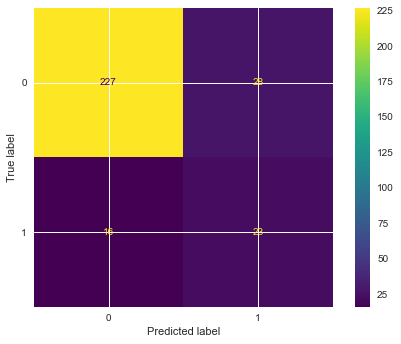

In [356]:
plot_confusion_matrix(final_final_pipe, X_test,
                      y_test)

## Modeling 2 - Decision Tree 

In [51]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

In [52]:
numeric_pipeline = Pipeline([('std_scaler', StandardScaler())])

nominal_pipeline=Pipeline([('hotenco',OneHotEncoder(categories='auto',drop='first')),('onehotnorm',MaxAbsScaler())])

ct = ColumnTransformer([ 
     ("nominalpipe", nominal_pipeline,nominal_cols),
     ("numpipe", numeric_pipeline,num_cols)])

In [53]:
masterdf['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [54]:
decisionT_pipe=Pipeline([
        ("preprocess", ct),
        ('under', RandomUnderSampler(sampling_strategy=0.5)),
        ('rf_clf', DecisionTreeClassifier(random_state=42))])

In [55]:
decisionT_pipe.fit(X_train, y_train)
predicted = decisionT_pipe.predict(X_test)

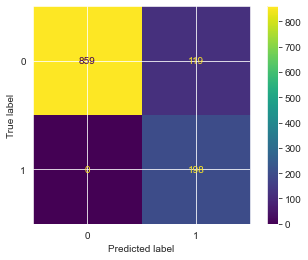

In [56]:
plot_confusion_matrix(decisionT_pipe, X_train,
                      y_train)

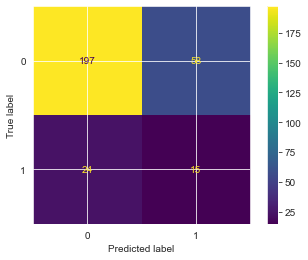

In [57]:
plot_confusion_matrix(decisionT_pipe, X_test,
                      y_test)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       255
           1       0.44      0.54      0.48        39

    accuracy                           0.85       294
   macro avg       0.68      0.72      0.70       294
weighted avg       0.86      0.85      0.85       294



In [59]:
print(f'Accuracy Score: {accuracy_score(y_test,predicted)}')
print(f'Precision Score: {precision_score(y_test,predicted)}')
print(f'Recall Score: {recall_score(y_test,predicted)}')
print(f'F1 Score: {f1_score(y_test,predicted)}')

Accuracy Score: 0.7210884353741497
Precision Score: 0.2054794520547945
Recall Score: 0.38461538461538464
F1 Score: 0.26785714285714285


###### Model tuning to achieve a better result

In [60]:
grid_param = [{
    'rf_clf__max_depth': [3,4,5],
    'rf_clf__min_samples_leaf':[20,30,40],
    'rf_clf__min_samples_split':[75,100,120],
    'rf_clf__criterion':['entropy','gini']
    
}]

tree=GridSearchCV(estimator = decisionT_pipe,param_grid=grid_param,cv=3)
tree.fit(X_train,y_train)

tree.best_params_

{'rf_clf__criterion': 'entropy',
 'rf_clf__max_depth': 5,
 'rf_clf__min_samples_leaf': 30,
 'rf_clf__min_samples_split': 100}

In [61]:
bestresult=tree.best_estimator_

In [62]:
def results(model,X, y):
    y_pred = model.predict(X)
    print(f'Accuracy Score: {accuracy_score(y,y_pred)}')
    print(f'Precision Score: {precision_score(y,y_pred)}')
    print(f'Recall Score: {recall_score(y,y_pred)}')
    print(f'F1 Score: {f1_score(y,y_pred)}')
    plot_confusion_matrix(model,X,y,cmap="GnBu_r")

Accuracy Score: 0.8001700680272109
Precision Score: 0.4332129963898917
Recall Score: 0.6060606060606061
F1 Score: 0.5052631578947369


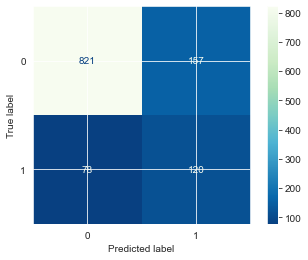

In [64]:
results(bestresult,X_train,y_train)

Accuracy Score: 0.7380952380952381
Precision Score: 0.22058823529411764
Recall Score: 0.38461538461538464
F1 Score: 0.2803738317757009


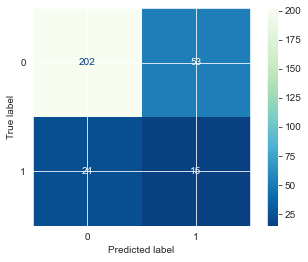

In [65]:
results(bestresult,X_test,y_test)

###### Best outcome for Decision Tree model

In [68]:
Final_decisionT_pipe=Pipeline([
        ("preprocess", ct),
        ('under', RandomUnderSampler(sampling_strategy=0.5)),
        ('rf_clf', DecisionTreeClassifier(criterion = 'entropy', max_depth = 5,min_samples_leaf=30,min_samples_split=100, random_state=42))])
Final_decisionT_pipe.fit(X_train,y_train)
decisionT_predicted = Final_decisionT_pipe.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test,decisionT_predicted)}')
print(f'Precision Score: {precision_score(y_test,decisionT_predicted)}')
print(f'Recall Score: {recall_score(y_test,decisionT_predicted)}')
print(f'F1 Score: {f1_score(y_test,decisionT_predicted)}')

Accuracy Score: 0.7857142857142857
Precision Score: 0.26
Recall Score: 0.3333333333333333
F1 Score: 0.2921348314606742


In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       255
           1       0.44      0.54      0.48        39

    accuracy                           0.85       294
   macro avg       0.68      0.72      0.70       294
weighted avg       0.86      0.85      0.85       294



## Modeling 3 - KNN - K Nearest Neighbour

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

In [71]:
decisionT_pipe.steps.pop(-1)
decisionT_pipe.steps.append(['KNN', KNeighborsClassifier()])

In [72]:
KNN_pipe=decisionT_pipe

In [73]:
KNN_pipe.fit(X_train, y_train)
predicted = KNN_pipe.predict(X_test)

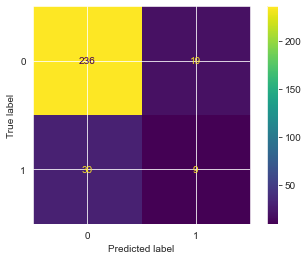

In [74]:
plot_confusion_matrix(KNN_pipe, X_test,
                      y_test)

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       255
           1       0.44      0.54      0.48        39

    accuracy                           0.85       294
   macro avg       0.68      0.72      0.70       294
weighted avg       0.86      0.85      0.85       294



###### Tuning - KNN

In [76]:
%%time
param=[{'KNN__n_neighbors': [10,12,15,18],
    'KNN__metric': ['manhattan','minkowski'],
    'KNN__weights': ['uniform']
}]

KNN=GridSearchCV(estimator = KNN_pipe, param_grid=param, cv=3)

KNN.fit(X_train,y_train)

KNN.best_params_

CPU times: user 627 ms, sys: 5.82 ms, total: 633 ms
Wall time: 633 ms


{'KNN__metric': 'manhattan', 'KNN__n_neighbors': 18, 'KNN__weights': 'uniform'}

In [77]:
bestresult=KNN.best_estimator_

def results(model,X, y):
    y_pred = model.predict(X)
    print(f'Accuracy Score: {accuracy_score(y,y_pred)}')
    print(f'Precision Score: {precision_score(y,y_pred)}')
    print(f'Recall Score: {recall_score(y,y_pred)}')
    print(f'F1 Score: {f1_score(y,y_pred)}')
    plot_confusion_matrix(model,X,y,cmap="GnBu_r")


In [78]:
KNN_pipe.fit(X_train,y_train)
predict=KNN_pipe.predict(X_test)

Accuracy Score: 0.8613945578231292
Precision Score: 0.7108433734939759
Recall Score: 0.29797979797979796
F1 Score: 0.4199288256227757


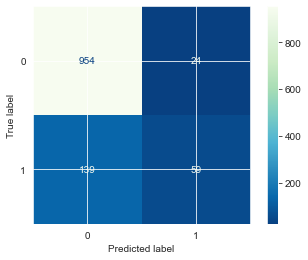

In [79]:
results(bestresult,X_train,y_train)

Accuracy Score: 0.8809523809523809
Precision Score: 0.7
Recall Score: 0.1794871794871795
F1 Score: 0.2857142857142857


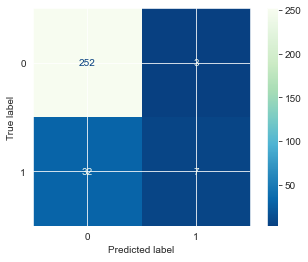

In [80]:
results(bestresult,X_test,y_test)

###### Best outcome for KNN

In [81]:
Final_KNN_pipe=Pipeline([
        ("preprocess", ct),
        ('under', RandomUnderSampler(sampling_strategy=0.5)),
        ('KNN', KNeighborsClassifier(metric='manhattan', n_neighbors = 12, weights= 'uniform'))])
Final_KNN_pipe.fit(X_train,y_train)
predicted_final = Final_KNN_pipe.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test,predicted_final)}')
print(f'Precision Score: {precision_score(y_test,predicted_final)}')
print(f'Recall Score: {recall_score(y_test,predicted_final)}')
print(f'F1 Score: {f1_score(y_test,predicted_final)}')

Accuracy Score: 0.8775510204081632
Precision Score: 0.6
Recall Score: 0.23076923076923078
F1 Score: 0.33333333333333337


## Modeling 4 - XG Boosting

In [82]:
from xgboost import XGBClassifier

In [83]:
KNN_pipe.steps.pop(-1)
KNN_pipe.steps.append(['Booster', XGBClassifier()])

In [84]:
Boost_pipe=KNN_pipe

In [85]:
Boost_pipe.fit(X_train,y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('hotenco',
                                                                   OneHotEncoder(drop='first')),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'AgeRange', 'IncomeDistribution'],
      dtype='object')),
                                                 ('numpipe',
                                                  Pipeline(steps=[('std_scaler',
                                                                   Stand...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None)]])

In [86]:
y_pred=Boost_pipe.predict(X_test)

In [87]:
Boost_pipe.score(X_test,y_test)

0.7891156462585034

In [88]:
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Precision Score: {precision_score(y_test,y_pred)}')
print(f'Recall Score: {recall_score(y_test,y_pred)}')
print(f'F1 Score: {f1_score(y_test,y_pred)}')

Accuracy Score: 0.7891156462585034
Precision Score: 0.3050847457627119
Recall Score: 0.46153846153846156
F1 Score: 0.3673469387755103


###### XG Boosting Tuning

In [89]:
%%time
params = [{'Booster__max_depth': [4,5,6], 'Booster__learning_rate': [.3,.4],
          'Booster__gamma': [0,5,10], 'Booster__colsample_bynode': [.5, .75, 1],'Booster__n_estimators': [100, 150,200]}]

Boost=GridSearchCV(estimator = Boost_pipe, param_grid=params, cv=5)

Boost.fit(X_train,y_train)

Boost.best_params_

CPU times: user 7min 22s, sys: 43.2 s, total: 8min 5s
Wall time: 1min 3s


{'Booster__colsample_bynode': 0.75,
 'Booster__gamma': 10,
 'Booster__learning_rate': 0.3,
 'Booster__max_depth': 5,
 'Booster__n_estimators': 100}

In [90]:
bestresult=Boost.best_estimator_
y_pred= Boost_pipe.predict(X_test)

def results(model,X, y):
    y_pred = model.predict(X)
    print(f'Accuracy Score: {accuracy_score(y,y_pred)}')
    print(f'Precision Score: {precision_score(y,y_pred)}')
    print(f'Recall Score: {recall_score(y,y_pred)}')
    print(f'F1 Score: {f1_score(y,y_pred)}')
    plot_confusion_matrix(model,X,y,cmap="GnBu_r")


Accuracy Score: 0.8707482993197279
Precision Score: 0.6337209302325582
Recall Score: 0.5505050505050505
F1 Score: 0.5891891891891893


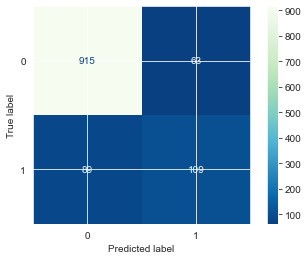

In [91]:
results(bestresult,X_train,y_train)

Accuracy Score: 0.8231292517006803
Precision Score: 0.3142857142857143
Recall Score: 0.28205128205128205
F1 Score: 0.29729729729729726


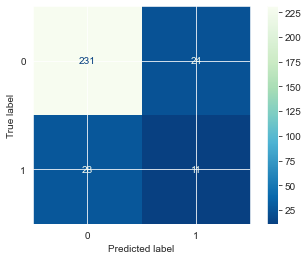

In [92]:
results(bestresult,X_test,y_test)

###### Best outcome - XG Boosting

In [93]:
Final_Boosting_pipe=Pipeline([
        ("preprocess", ct),
        ('under', RandomUnderSampler(sampling_strategy=0.5)),
        ('Booster', XGBClassifier(colsample_bynode=1,
 gamma=5,
learning_rate= 0.3,
max_depth=6,
n_estimators= 150))])
Final_Boosting_pipe.fit(X_train,y_train)
Boost_predicted = Final_Boosting_pipe.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test,Boost_predicted)}')
print(f'Precision Score: {precision_score(y_test,Boost_predicted)}')
print(f'Recall Score: {recall_score(y_test,Boost_predicted)}')
print(f'F1 Score: {f1_score(y_test,Boost_predicted)}')

Accuracy Score: 0.8129251700680272
Precision Score: 0.3
Recall Score: 0.3076923076923077
F1 Score: 0.3037974683544304


## Random Forrest Modeling

In [94]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,\
ExtraTreesClassifier, VotingClassifier, StackingRegressor

In [95]:
decisionT_pipe.steps.pop(-1)
decisionT_pipe.steps.append(['RF', RandomForestClassifier()])

In [96]:
RF_pipe=decisionT_pipe

In [97]:
RF_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('nominalpipe',
                                                  Pipeline(steps=[('hotenco',
                                                                   OneHotEncoder(drop='first')),
                                                                  ('onehotnorm',
                                                                   MaxAbsScaler())]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'AgeRange', 'IncomeDistribution'],
      dtype='object')),
                                                 ('numpipe',
                                                  Pipeline(steps=[('std_scaler',
                                                                   Stand...
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'YearlyIncome'],
      dtype='object'))])),
                ('under', RandomUnderSampler(sampling_strategy=0.5)),
                ['RF', RandomForestClassifier()]])

In [98]:
predict=RF_pipe.predict(X_test)

In [580]:
print(f'Accuracy Score: {accuracy_score(y_test,predict)}')
print(f'Precision Score: {precision_score(y_test,predict)}')
print(f'Recall Score: {recall_score(y_test,predict)}')
print(f'F1 Score: {f1_score(y_test,predict)}')

Accuracy Score: 0.8673469387755102
Precision Score: 0.5
Recall Score: 0.20512820512820512
F1 Score: 0.29090909090909095


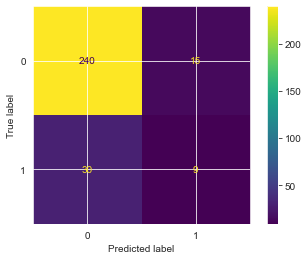

In [99]:
plot_confusion_matrix(RF_pipe, X_test,
                      y_test)

###### Random Forest Model Tuning

In [100]:
%%time
param=[{'RF__n_estimators':[50,100,150],
        'RF__criterion':['gini','entropy'],
        'RF__max_depth':[4,5,6],
        'RF__min_samples_split':[30,60,90]      
}]

RF=GridSearchCV(estimator = RF_pipe, param_grid=param, cv=5)

RF.fit(X_train,y_train)

RF.best_params_

CPU times: user 24.5 s, sys: 166 ms, total: 24.7 s
Wall time: 24.7 s


{'RF__criterion': 'entropy',
 'RF__max_depth': 4,
 'RF__min_samples_split': 60,
 'RF__n_estimators': 50}

In [101]:
RF_pipe.fit(X_train,y_train)
predict=RF_pipe.predict(X_test)

In [102]:
bestresult=RF.best_estimator_

def results(model,X, y):
    y_pred = model.predict(X)
    print(f'Accuracy Score: {accuracy_score(y,y_pred)}')
    print(f'Precision Score: {precision_score(y,y_pred)}')
    print(f'Recall Score: {recall_score(y,y_pred)}')
    print(f'F1 Score: {f1_score(y,y_pred)}')
    plot_confusion_matrix(model,X,y,cmap="GnBu_r")


Accuracy Score: 0.8664965986394558
Precision Score: 0.664
Recall Score: 0.41919191919191917
F1 Score: 0.5139318885448916


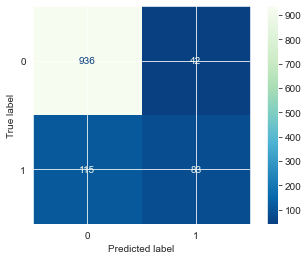

In [103]:
results(bestresult,X_train,y_train)

Accuracy Score: 0.8503401360544217
Precision Score: 0.38095238095238093
Recall Score: 0.20512820512820512
F1 Score: 0.26666666666666666


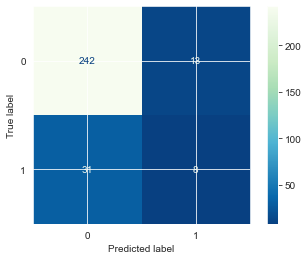

In [104]:
results(bestresult,X_test,y_test)

###### Best Result for Random Forrest

In [602]:
RF_pipe.steps[-1]=['RF', RandomForestClassifier(criterion= 'entropy', max_depth= 6, min_samples_split=60, n_estimators= 150)]
Final_RF_pipe=RF_pipe
Final_RF_pipe.fit(X_train,y_train)
final_predicted = Final_RF_pipe.predict(X_test)
print(f'Accuracy Score: {accuracy_score(y_test,final_predicted)}')
print(f'Precision Score: {precision_score(y_test,final_predicted)}')
print(f'Recall Score: {recall_score(y_test,final_predicted)}')
print(f'F1 Score: {f1_score(y_test,final_predicted)}')

Accuracy Score: 0.8503401360544217
Precision Score: 0.3684210526315789
Recall Score: 0.1794871794871795
F1 Score: 0.2413793103448276


In [603]:
pred_prob1 = Final_RF_pipe.predict_proba(X_test)
pred_prob2 = Final_Boosting_pipe.predict_proba(X_test)
pred_prob3 = Final_KNN_pipe.predict_proba(X_test)
pred_prob4 = final_final_pipe.predict_proba(X_test)

In [604]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob3[:,1])



In [605]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

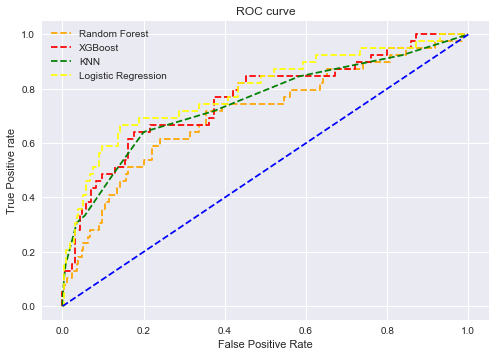

In [606]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Random Forest')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='XGBoost')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='KNN')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='Logistic Regression')


plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [238]:
ohe = OneHotEncoder(handle_unknown = 'ignore')

ohe_train = ohe.fit_transform(X_train[nominal_cols]).toarray()
ohe_test = ohe.transform(X_test[nominal_cols]).toarray()

ohe_train = pd.DataFrame(ohe_train, columns = ohe.get_feature_names())
ohe_test = pd.DataFrame(ohe_test, columns = ohe.get_feature_names())

col=X_train.drop(X_train[nominal_cols],axis=1)
features=col.columns

ohe_cols=ohe_train.columns
column_names=np.append(features,ohe_cols)

In [275]:
RF_data=Final_RF_pipe['RF'].feature_importances_

In [287]:
RF_data

array([0.01783063, 0.00322885, 0.02107531, 0.02149151, 0.00590336,
       0.00835756, 0.00460028, 0.0008257 , 0.00387316, 0.00437514,
       0.00124659, 0.01238818, 0.00193157, 0.00363797, 0.00324326,
       0.00655969, 0.01677181, 0.01259044, 0.00492998, 0.04537413,
       0.00284444, 0.00221026, 0.01042848, 0.01213262, 0.06740276,
       0.00582014, 0.03847837, 0.01598665, 0.00652531, 0.0192169 ,
       0.01801788, 0.01994445, 0.02732097, 0.1577958 , 0.01441206,
       0.00155991, 0.00734909, 0.08900885, 0.04124203, 0.00961126,
       0.02044979, 0.04996071, 0.04043477, 0.01875733, 0.02886538,
       0.07398869])

In [289]:
feature_data=RF_data[0:20]

In [293]:
len(feature_data)

20

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'DistanceFromHome'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'EnvironmentSatisfaction'),
  Text(4, 0, 'JobInvolvement'),
  Text(5, 0, 'JobSatisfaction'),
  Text(6, 0, 'NumCompaniesWorked'),
  Text(7, 0, 'OverTime'),
  Text(8, 0, 'PercentSalaryHike'),
  Text(9, 0, 'PerformanceRating'),
  Text(10, 0, 'RelationshipSatisfaction'),
  Text(11, 0, 'StockOptionLevel'),
  Text(12, 0, 'TotalWorkingYears'),
  Text(13, 0, 'TrainingTimesLastYear'),
  Text(14, 0, 'WorkLifeBalance'),
  Text(15, 0, 'YearsAtCompany'),
  Text(16, 0, 'YearsInCurrentRole'),
  Text(17, 0, 'YearsSinceLastPromotion'),
  Text(18, 0, 'YearsWithCurrManager'),
  Text(19, 0, 'YearlyIncome')])

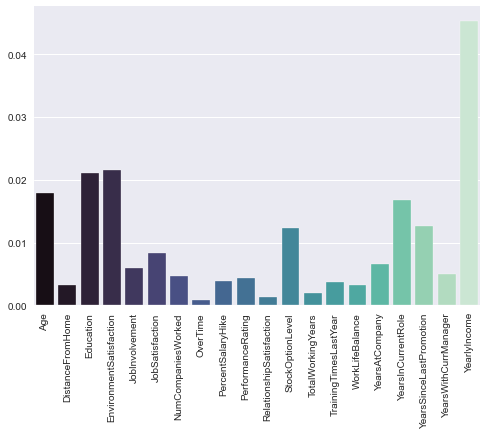

In [301]:
sns.barplot(x=features,y=feature_data,palette='mako')
plt.xticks(rotation=90)

In [299]:
feature_importance

In [298]:
feature_importance=zip(features,RF_data)